In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./data/gm2offline_ana.root")
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")
tcomp = f.Get("farline").Get("evwTree")
terr = f.Get("farline").Get("evwNoPartnerTree")

tcomp2 = f.Get("farline").Get("wveTree")
terr2 = f.Get("farline").Get("wveNoPartnerTree")

In [3]:
f.cd("farline")
f.ls()

TFile**		./data/gm2offline_ana.root	
 TFile*		./data/gm2offline_ana.root	
  TDirectoryFile*		farline	farline (ReconComparisonEastVsWest) folder
   OBJ: TTree	eventTree	eventTree : 0 at: 0x7fffedfd99f0
   OBJ: TTree	eastTree	eastTree : 0 at: 0x7fffedfeffa0
   OBJ: TTree	evwTree	evwTree : 0 at: 0x7fffedfef580
   OBJ: TTree	evwNoPartnerTree	evwNoPartnerTree : 0 at: 0x7fffe879d710
   OBJ: TTree	wveTree	wveTree : 0 at: 0x7fffedfd5030
   OBJ: TTree	wveNoPartnerTree	wveNoPartnerTree : 0 at: 0x7fffee086360
   KEY: TDirectoryFile	evw_calo1;1	evw_calo1
   KEY: TDirectoryFile	evw_calo2;1	evw_calo2
   KEY: TDirectoryFile	evw_calo3;1	evw_calo3
   KEY: TDirectoryFile	evw_calo4;1	evw_calo4
   KEY: TDirectoryFile	evw_calo5;1	evw_calo5
   KEY: TDirectoryFile	evw_calo6;1	evw_calo6
   KEY: TDirectoryFile	evw_calo7;1	evw_calo7
   KEY: TDirectoryFile	evw_calo8;1	evw_calo8
   KEY: TDirectoryFile	evw_calo9;1	evw_calo9
   KEY: TDirectoryFile	evw_calo10;1	evw_calo10
   KEY: TDirectoryFile	evw_calo11;1	evw_calo

Lets use this notebook file to look at the outliers. We can first select them based on a greater than normal value of deltaE

In [7]:
cut = "TMath::Abs(deltaE) > 1000"

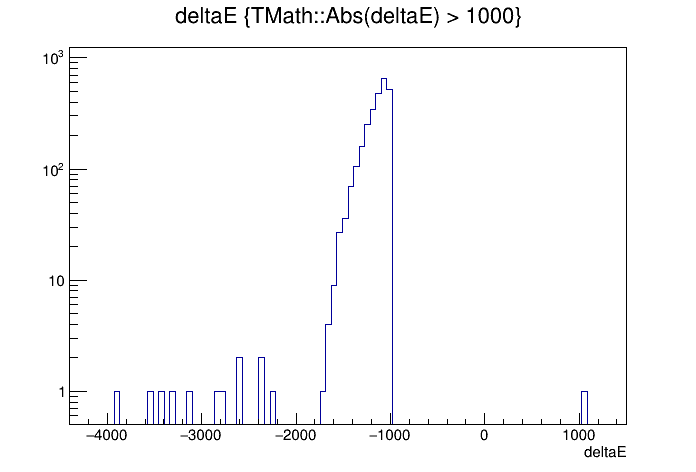

In [8]:
c = r.TCanvas()
tcomp.Draw("deltaE",cut,"")
c.SetLogy()
c.Draw()

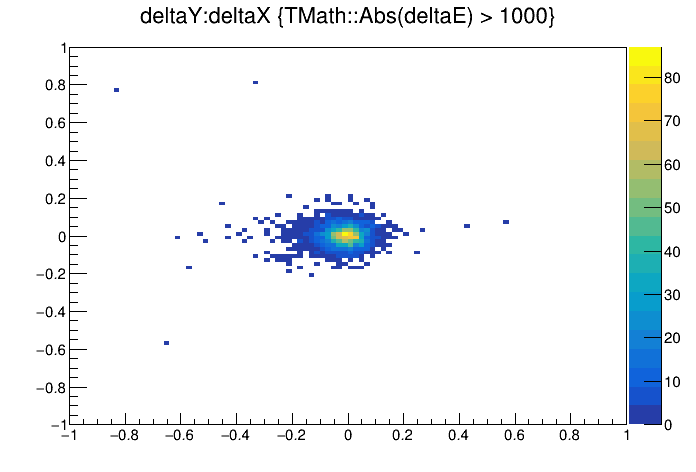

In [18]:
c = r.TCanvas()
tcomp.Draw("deltaY:deltaX>>ding(100,-1,1,100,-1,1)",cut,"colz")
#c.SetLogy()
c.Draw()

[<ROOT.TH2D object ("h1") at 0x7fffee5fa4b0>, <ROOT.TH2D object ("h2") at 0x7fffed827650>, <ROOT.TH2D object ("h3") at 0x7fffee5dd880>, <ROOT.TH2D object ("h4") at 0x7fffee492440>, <ROOT.TH2D object ("h5") at 0x7fffee5efa40>, <ROOT.TH2D object ("h6") at 0x7fffee5bf630>, <ROOT.TH2D object ("h7") at 0x7fffee215e80>, <ROOT.TH2D object ("h8") at 0x7fffee5c5520>, <ROOT.TH2D object ("h9") at 0x7fffee5f75a0>, <ROOT.TH2D object ("h10") at 0x7fffee554b60>, <ROOT.TH2D object ("h11") at 0x7fffee5ead50>, <ROOT.TH2D object ("h12") at 0x7fffee5cbb70>, <ROOT.TH2D object ("h13") at 0x7fffee5ddfd0>, <ROOT.TH2D object ("h14") at 0x7fffee5fbd80>, <ROOT.TH2D object ("h15") at 0x7fffee5e9380>, <ROOT.TH2D object ("h16") at 0x7fffee5e3770>, <ROOT.TH2D object ("h17") at 0x7fffed82a540>, <ROOT.TH2D object ("h18") at 0x7fffee49dd00>, <ROOT.TH2D object ("h19") at 0x7fffee0b70e0>, <ROOT.TH2D object ("h20") at 0x7fffee49b650>, <ROOT.TH2D object ("h21") at 0x7fffee4e0fb0>, <ROOT.TH2D object ("h22") at 0x7fffee4a6d3

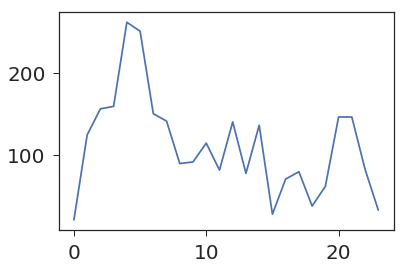

Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TDirector

In [38]:
#lets also break this up by calo

hDeltaYXbyCaloVec = []
for calo in range(1,25):
    hi = r.TH2D("hi","h"+str(calo),100,-1,1,100,-1,1)
    tcomp.Draw("deltaY:deltaX>>hi",cut+"&& caloNum == "+str(calo),"goff")
    hDeltaYXbyCaloVec.append( hi.Clone("h"+str(calo)) )
print(hDeltaYXbyCaloVec)

entriesVec = [hi.GetEntries() for hi in hDeltaYXbyCaloVec]
plt.plot(entriesVec)
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


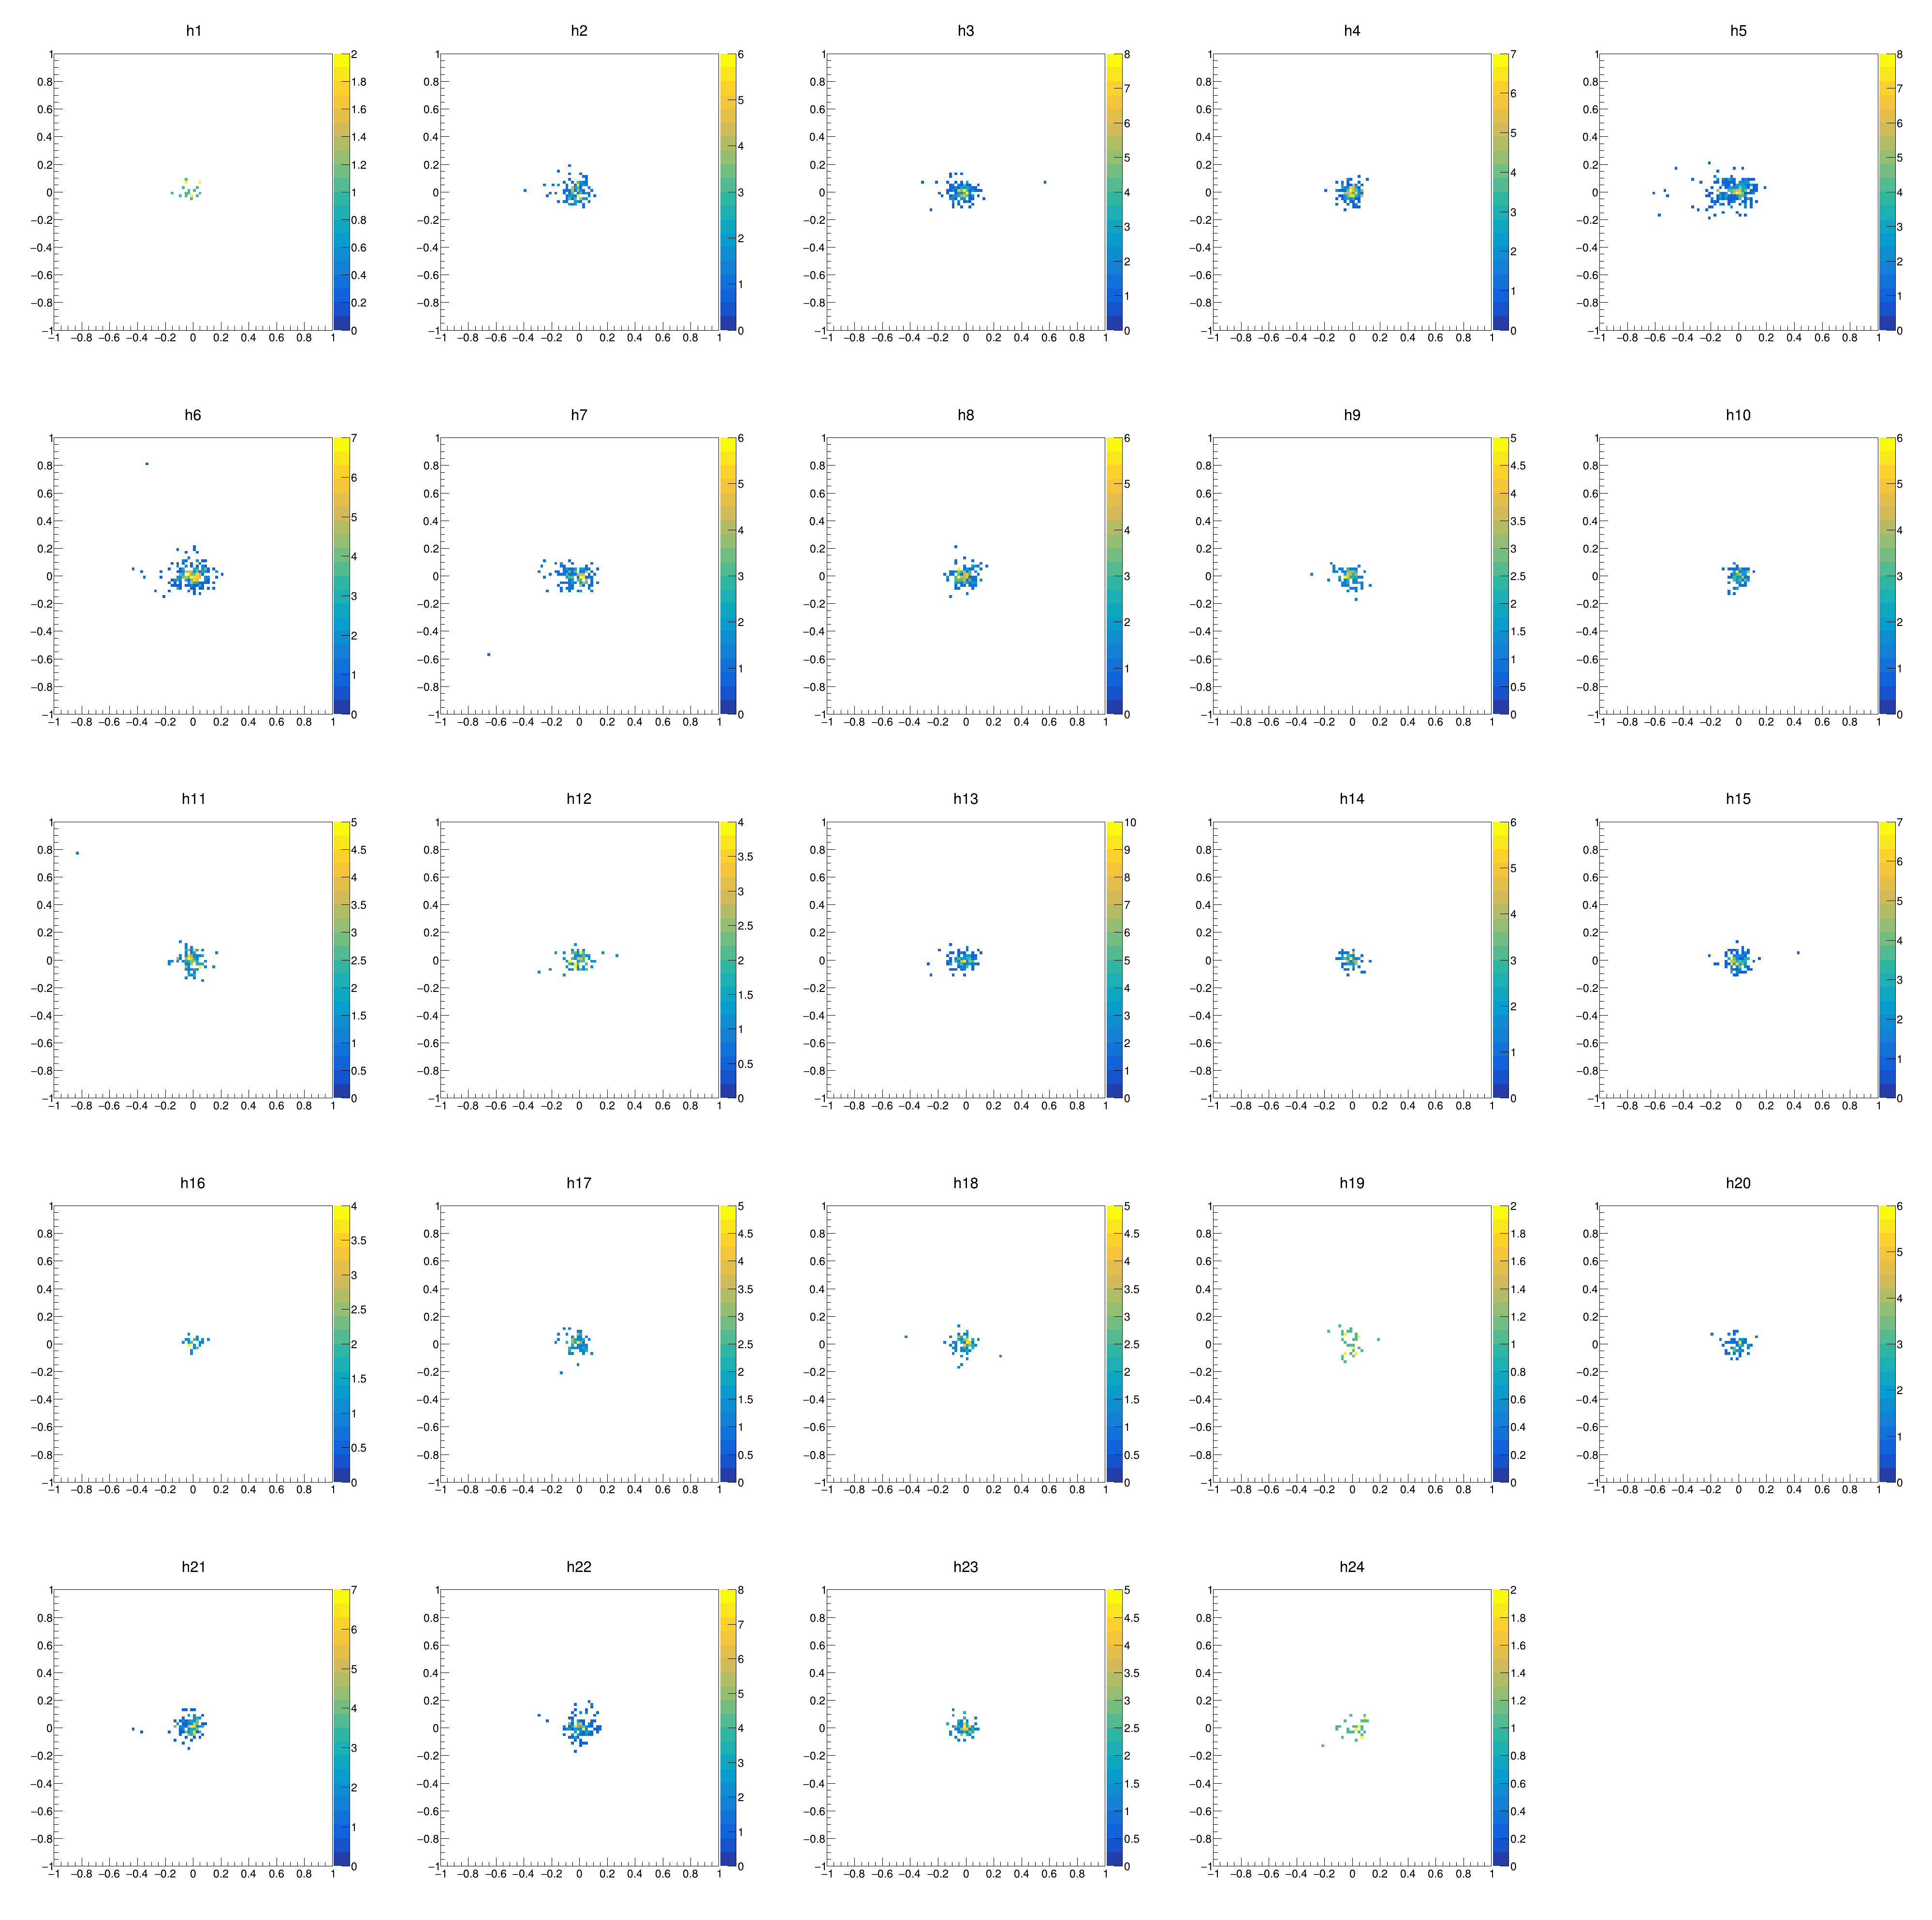

In [39]:
c = r.TCanvas("c","c",4000,4000)
c.Divide(5,5)
for calo in range(1,25):
    c.cd(calo)
    
    hDeltaYXbyCaloVec[calo-1].Draw("COLZ")    
c.Draw()

In [2]:
#file = uproot.open("./data/gm2offline_ana.root") #smol file
file = uproot.open("./data/gm2offline_ana_100files_fullTrees.root") #big file.
tree = file["farline/evwTree"]

df = tree.pandas.df(lambda b: b.interpretation if not isinstance(b.interpretation, uproot.asjagged) else None)
df['timeEastCorrected'] = df['timeEast'] - df['timeCorr']
df.columns = ["runNum","subRunNum","fill","islandEast","islandWest","caloNum","timeEast","timeWest","deltaT","westX",
                "westY", "eastX","eastY","deltaX","deltaY","energyEast","energyWest","deltaE","timeCorr"
#              , "numberOfCrystals" #remove for the large file, was made with an earlier version of the software
              , "timeEastCorrected"]
df.describe()

,runNum,subRunNum,fill,islandEast,islandWest,caloNum,timeEast,timeWest,deltaT,westX,westY,eastX,eastY,deltaX,deltaY,energyEast,energyWest,deltaE,timeCorr,timeEastCorrected
count,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06,6.138641e+06
mean,1.636227e+04,2.418611e+02,1.027204e+02,1.454450e+02,1.454450e+02,1.253214e+01,1.317310e+05,1.317318e+05,-7.198210e-01,3.878856e+00,3.034490e+00,3.878856e+00,3.034490e+00,-1.079738e-02,5.509665e-04,7.936199e+02,1.202516e+03,-4.088960e+02,-7.183180e-01,1.317318e+05
std,4.969772e+00,1.494823e+02,5.953586e+01,2.233182e+01,2.233182e+01,6.919896e+00,5.139184e+04,5.139184e+04,8.386986e-01,2.654057e+00,1.275939e+00,2.654057e+00,1.275939e+00,3.025551e-01,1.200590e-01,4.787846e+02,7.125675e+02,3.001558e+02,8.378238e-01,5.139184e+04
min,1.635500e+04,5.000000e+00,1.000000e+00,3.900000e+01,3.900000e+01,1.000000e+00,8.000002e+04,8.000008e+04,-3.031596e+00,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,-8.000000e+00,-3.803428e+00,2.914035e+01,5.853293e+00,-5.823207e+03,-2.533535e+00,8.000012e+04
25%,1.635700e+04,1.070000e+02,5.100000e+01,1.300000e+02,1.300000e+02,7.000000e+00,9.498853e+04,9.498931e+04,-9.455497e-01,1.421119e+00,2.111335e+00,1.421119e+00,2.111335e+00,-6.462936e-02,-3.841449e-02,3.819654e+02,5.812335e+02,-6.016395e+02,-9.550932e-01,9.498928e+04
50%,1.636300e+04,2.230000e+02,1.020000e+02,1.450000e+02,1.450000e+02,1.300000e+01,1.159816e+05,1.159823e+05,-5.300007e-01,3.500000e+00,3.072123e+00,3.500000e+00,3.072123e+00,-1.020499e-02,0.000000e+00,7.533268e+02,1.159088e+03,-3.622459e+02,-5.393264e-01,1.159823e+05
75%,1.636700e+04,3.710000e+02,1.540000e+02,1.610000e+02,1.610000e+02,1.800000e+01,1.518084e+05,1.518090e+05,-1.435922e-01,6.091128e+00,3.997505e+00,6.091128e+00,3.997505e+00,3.484468e-02,3.927978e-02,1.146562e+03,1.756202e+03,-1.645038e+02,-1.844449e-01,1.518090e+05
max,1.637000e+04,4.960000e+02,2.390000e+02,2.700000e+02,2.700000e+02,2.400000e+01,5.351912e+05,5.351921e+05,1.035653e+00,8.500000e+00,5.500000e+00,8.500000e+00,5.500000e+00,8.020502e+00,3.865713e+00,9.480588e+03,1.530380e+04,1.124473e+03,5.433260e-01,5.351919e+05


In [3]:
dfOutliers = df.loc[df['deltaE'] < -1000]
dfOutliers.describe()

,runNum,subRunNum,fill,islandEast,islandWest,caloNum,timeEast,timeWest,deltaT,westX,westY,eastX,eastY,deltaX,deltaY,energyEast,energyWest,deltaE,timeCorr,timeEastCorrected
count,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000,250466.000000
mean,16362.382619,243.882467,102.697859,146.738483,146.738483,11.179821,131664.643083,131665.290856,-0.647773,2.440053,3.134093,2.440053,3.134093,-0.018528,0.000174,1296.524772,2454.680510,-1158.155738,-0.631524,131665.274607
std,4.854040,149.123540,59.603411,21.520831,21.520831,6.609256,51354.425437,51354.427991,0.888675,1.574664,1.099234,1.574664,1.099234,0.280040,0.107446,263.050539,305.085765,166.193382,0.887609,51354.428046
min,16355.000000,5.000000,1.000000,56.000000,56.000000,1.000000,80000.431759,80000.461896,-2.961231,0.500000,0.500000,0.500000,0.500000,-6.825509,-3.803428,108.011837,1231.337165,-5823.207267,-2.533535,80000.433783
25%,16357.000000,110.000000,51.000000,132.000000,132.000000,5.000000,95017.249867,95017.830886,-0.930395,1.198726,2.291867,1.198726,2.291867,-0.044844,-0.029716,1127.605769,2260.253452,-1219.321018,-0.908760,95017.780296
50%,16363.000000,227.000000,102.000000,147.000000,147.000000,10.000000,115650.185878,115651.454993,-0.421861,2.137952,3.199472,2.137952,3.199472,-0.007595,0.000000,1301.062459,2460.758823,-1115.465338,-0.461741,115651.452425
75%,16367.000000,371.000000,154.000000,161.000000,161.000000,17.000000,151854.790961,151855.421362,-0.073499,3.378463,4.068904,3.378463,4.068904,0.025094,0.029997,1474.485734,2653.336447,-1049.125807,-0.017225,151855.378468
max,16370.000000,496.000000,239.000000,238.000000,238.000000,24.000000,533679.008507,533681.431241,0.965048,8.500000,5.500000,8.500000,5.500000,5.622124,3.264990,9480.588278,15303.795545,-1000.000158,0.543326,533681.439059


/home/jlab/anaconda3/lib/python3.6/site-packages/seaborn/palettes.py:727: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


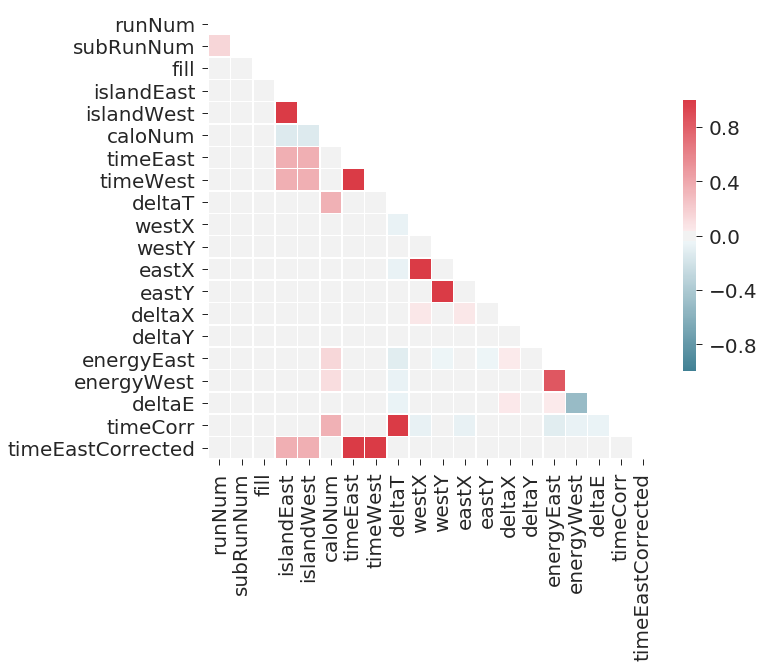

In [5]:
corr = dfOutliers.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap=plt.cm.viridis

# Draw the heatmap with the mask and correct aspect ratio
#, mask=mask
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            , mask=mask
           )

plt.show()

Lets compare it to the regular data

/home/jlab/anaconda3/lib/python3.6/site-packages/seaborn/palettes.py:727: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


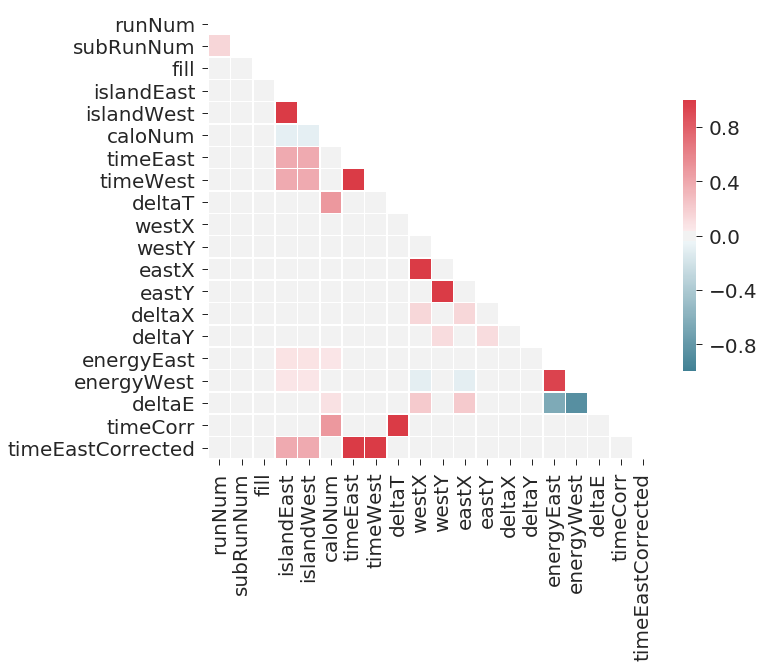

In [6]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap=plt.cm.viridis

# Draw the heatmap with the mask and correct aspect ratio
#, mask=mask
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            , mask=mask
           )

plt.show()